# Scenario comparison

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('scenario_comparison_table.xlsx', sheet_name = 'Overview', header = 1, usecols = "B:E, Q:T", engine = 'openpyxl')
df.rename(columns = {'Primary materials.2': 'Primary materials', 'Secondary materials.2': 'Secondary materials', 'Reused batteries.2': 'Reused batteries', 'New batteries.2': 'New batteries'}, inplace = True)

In [3]:
df

,EV Scenario,Reuse Scenario,V2G Scenario,Storage Demand Scenario,Primary materials,Secondary materials,Reused batteries,New batteries
0,STEP,LFP reused,Low,Low,37939.702561,8642.780957,46.907132,5.862929
1,STEP,LFP reused,Low,Medium,37966.915236,8649.923964,52.759770,25.263338
2,STEP,LFP reused,Low,High,38001.236965,8659.229490,57.519889,49.899337
3,STEP,LFP reused,Low,CP4All,37973.185424,8648.360627,60.507420,27.921263
4,STEP,LFP reused,Moderate,Low,37930.920004,8641.181003,15.683625,0.000000
...,...,...,...,...,...,...,...,...
139,SD,All reused,No V2G,CP4All,51693.253017,2434.067218,3578.719373,52.491239
140,SD,All reused,Early,Low,54003.963706,30.401148,0.068615,0.000000
141,SD,All reused,Early,Medium,54009.352286,25.012568,0.169030,0.000000
142,SD,All reused,Early,High,54016.170587,18.194267,0.296087,0.000000


In [4]:
df_ascend_prim = df.sort_values(by = ['Primary materials'], ascending = False)
df_ascend_prim.reset_index(inplace = True)

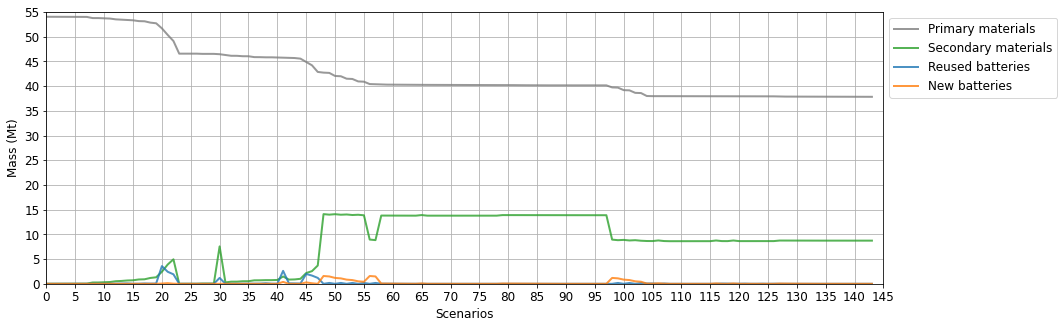

In [10]:
fig = plt.figure(figsize=[15, 5], facecolor ='white')
transp = 0.8     
plt.plot(df_ascend_prim['Primary materials']/1000, label = 'Primary materials', alpha = transp, linewidth = 2, color = 'tab:grey')
plt.plot(df_ascend_prim['Secondary materials']/1000, label = 'Secondary materials', alpha = transp, linewidth = 2, color = 'tab:green')
plt.plot(df_ascend_prim['Reused batteries']/1000, label = 'Reused batteries', alpha = transp, linewidth = 2, color = 'tab:blue')
plt.plot(df_ascend_prim['New batteries']/1000, label = 'New batteries', alpha = transp, linewidth = 2, color = 'tab:orange')
plt.grid()
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 145))
plt.yticks(np.arange(0, 60, 5))
plt.ylim((0,55))
plt.xlabel('Scenarios')
plt.ylabel('Mass (Mt)')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))

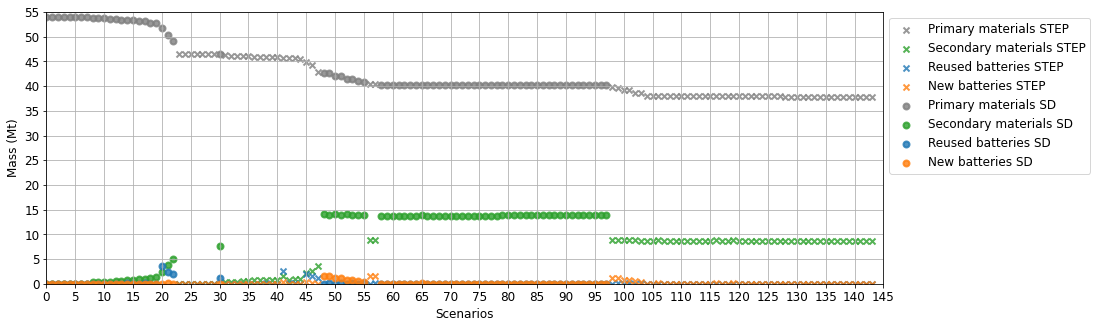

In [15]:
fig = plt.figure(figsize=[15, 5], facecolor ='white')
transp = 0.8     
for ev_scenario in ['STEP', 'SD']:
    if ev_scenario == 'STEP':
        pmarker = 'x'
    if ev_scenario == 'SD':
        pmarker = 'o'
    for col in ['Primary materials', 'Secondary materials', 'Reused batteries', 'New batteries']:
        if col == 'Primary materials':
            pcolor = 'tab:grey'
        if col == 'Secondary materials':
            pcolor = 'tab:green'
        if col == 'Reused batteries':
            pcolor = 'tab:blue'
        if col == 'New batteries':
            pcolor = 'tab:orange'
        # plot
        plt.scatter(df_ascend_prim.loc[df_ascend_prim['EV Scenario'] == ev_scenario, col].index,\
                    df_ascend_prim.loc[df_ascend_prim['EV Scenario'] == ev_scenario, col].values/1000,\
                    marker = pmarker, label = col+' '+ev_scenario, alpha = transp, linewidth = 2, c = pcolor)
# beautification
plt.grid()
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 145))
plt.yticks(np.arange(0, 60, 5))
plt.ylim((0,55))
plt.xlabel('Scenarios')
plt.ylabel('Mass (Mt)')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.savefig('mass_by_scenario.png', dpi = 300, bbox_inches = 'tight')